In [ ]:
!wget http://data.vision.ee.ethz.ch/cvl/food-101.tar.gz
!tar xzvf food-101.tar.gz

Output streaming akan dipotong hingga 5000 baris terakhir.
food-101/images/cannoli/695879.jpg
food-101/images/cannoli/1767088.jpg
food-101/images/cannoli/3201965.jpg
food-101/images/cannoli/3778102.jpg
food-101/images/cannoli/2674065.jpg
food-101/images/cannoli/1169899.jpg
food-101/images/cannoli/1378086.jpg
food-101/images/cannoli/803909.jpg
food-101/images/cannoli/1067240.jpg
food-101/images/cannoli/3002709.jpg
food-101/images/cannoli/2612632.jpg
food-101/images/cannoli/3627612.jpg
food-101/images/cannoli/1798703.jpg
food-101/images/cannoli/560632.jpg
food-101/images/cannoli/512468.jpg
food-101/images/cannoli/2331523.jpg
food-101/images/cannoli/3118302.jpg
food-101/images/cannoli/1499412.jpg
food-101/images/cannoli/1557459.jpg
food-101/images/cannoli/146566.jpg
food-101/images/cannoli/96922.jpg
food-101/images/cannoli/1699562.jpg
food-101/images/cannoli/730051.jpg
food-101/images/cannoli/2177977.jpg
food-101/images/cannoli/2767028.jpg
food-101/images/cannoli/6564.jpg
food-101/images/

In [ ]:
!head /content/food-101/meta/train.txt
!head /content/food-101/meta/classes.txt

apple_pie/1005649
apple_pie/1014775
apple_pie/1026328
apple_pie/1028787
apple_pie/1043283
apple_pie/1050519
apple_pie/1057749
apple_pie/1057810
apple_pie/1072416
apple_pie/1074856
apple_pie
baby_back_ribs
baklava
beef_carpaccio
beef_tartare
beet_salad
beignets
bibimbap
bread_pudding
breakfast_burrito


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as img
%matplotlib inline
import numpy as np
from collections import defaultdict
import collections
import os
from shutil import copy

def prepare_data(filepath, src,dest):
  classes_images = defaultdict(list)
  with open(filepath, 'r') as txt:
      paths = [read.strip() for read in txt.readlines()]
      for p in paths:
        food = p.split('/')
        classes_images[food[0]].append(food[1] + '.jpg')

  for food in classes_images.keys():
    print("\nCopying images into ",food)
    if not os.path.exists(os.path.join(dest,food)):
      os.makedirs(os.path.join(dest,food))
    for i in classes_images[food]:
      copy(os.path.join(src,food,i), os.path.join(dest,food,i))
  print("Copying Done!")


print("Creating train data...")
prepare_data('/content/food-101/meta/train.txt', '/content/food-101/images', '/content/food-101/train')

print("Creating test data...")
prepare_data('/content/food-101/meta/test.txt', '/content/food-101/images', '/content/food-101/test')

Creating train data...

Copying images into  apple_pie

Copying images into  baby_back_ribs

Copying images into  baklava

Copying images into  beef_carpaccio

Copying images into  beef_tartare

Copying images into  beet_salad

Copying images into  beignets

Copying images into  bibimbap

Copying images into  bread_pudding

Copying images into  breakfast_burrito

Copying images into  bruschetta

Copying images into  caesar_salad

Copying images into  cannoli

Copying images into  caprese_salad

Copying images into  carrot_cake

Copying images into  ceviche

Copying images into  cheesecake

Copying images into  cheese_plate

Copying images into  chicken_curry

Copying images into  chicken_quesadilla

Copying images into  chicken_wings

Copying images into  chocolate_cake

Copying images into  chocolate_mousse

Copying images into  churros

Copying images into  clam_chowder

Copying images into  club_sandwich

Copying images into  crab_cakes

Copying images into  creme_brulee

Copying im

In [ ]:
import tensorflow as tf
import tensorflow.keras.backend as K
from tensorflow.keras import regularizers
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Convolution2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D, AveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.regularizers import l2
from tensorflow import keras
from tensorflow.keras.models import load_model

K.clear_session()

n_classes = 101
img_width, img_height = 299, 299
train_data_dir = '/content/food-101/train'
validation_data_dir = '/content/food-101/test'
nb_train_samples = 75750
nb_validation_samples = 25250
batch_size = 75

train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=[.8, 1],
    horizontal_flip=True,
    fill_mode='reflect')

test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')


base_model = InceptionV3(weights='imagenet', include_top=False)
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128,activation='relu')(x)
x = Dropout(0.2)(x)

predictions = Dense(101,kernel_regularizer=regularizers.l2(0.005), activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)
model.compile(optimizer=SGD(lr=0.0001, momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])
checkpointer = ModelCheckpoint(filepath='best_model.h5', verbose=1, save_best_only=True)
csv_logger = CSVLogger('history.log')
history = model.fit(train_generator,
                    steps_per_epoch = nb_train_samples // batch_size,
                    validation_data=validation_generator,
                    validation_steps=nb_validation_samples // batch_size,
                    epochs=10,
                    verbose=1,
                    callbacks=[csv_logger, checkpointer])

model.save('Food_pregnagrowth.h5')

Found 75750 images belonging to 101 classes.
Found 25250 images belonging to 101 classes.


Epoch 1/10
1010/1010 [==============================] - ETA: 0s - loss: 2.3499 - accuracy: 0.5135
Epoch 1: val_loss improved from inf to 2.25163, saving model to best_model.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1010/1010 [==============================] - 2278s 2s/step - loss: 2.3499 - accuracy: 0.5135 - val_loss: 2.2516 - val_accuracy: 0.4906
Epoch 2/10
1010/1010 [==============================] - ETA: 0s - loss: 1.3592 - accuracy: 0.6977
Epoch 2: val_loss improved from 2.25163 to 1.44476, saving model to best_model.h5
1010/1010 [==============================] - 2246s 2s/step - loss: 1.3592 - accuracy: 0.6977 - val_loss: 1.4448 - val_accuracy: 0.6732
Epoch 3/10
1010/1010 [==============================] - ETA: 0s - loss: 1.1090 - accuracy: 0.7546
Epoch 3: val_loss improved from 1.44476 to 1.37271, saving model to best_model.h5
1010/1010 [==============================] - 2258s 2s/step - loss: 1.1090 - accuracy: 0.7546 - val_loss: 1.3727 - val_accuracy: 0.6908
Epoch 4/10
   2/1010 [..............................] - ETA: 30:26 - loss: 1.0564 - accuracy: 0.7467

KeyboardInterrupt: ignored

In [ ]:
import pandas as pd
model = load_model('/content/best_model.h5')
with open('/content/history.log', 'r') as f:
    history = pd.read_csv(f)

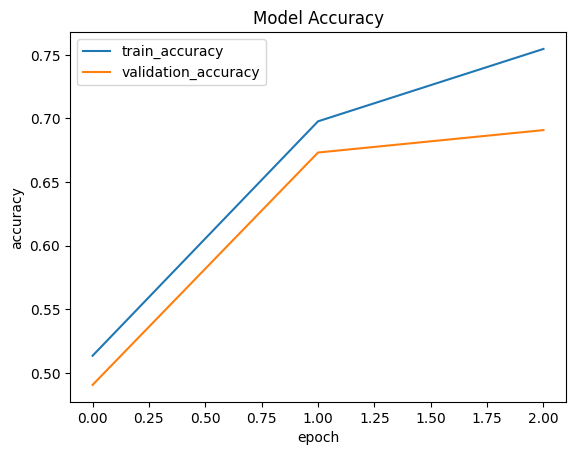

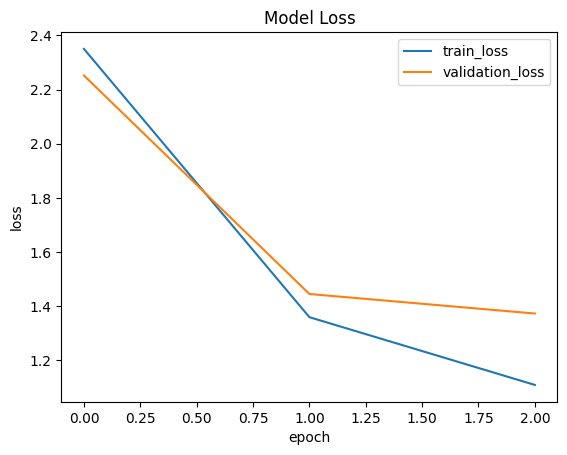

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train_accuracy', 'validation_accuracy'], loc='best')
plt.show()

plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'validation_loss'], loc='best')
plt.show()

In [ ]:
! pip install -q kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"danlabs","key":"4e0a65894531ce3ad49667839ba7a6ed"}'}

In [ ]:
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download -d liav22/food-images-afeka
! unzip food-images-afeka.zip

  0% 0.00/151k [00:00<?, ?B/s]
100% 151k/151k [00:00<00:00, 113MB/s]
Archive:  food-images-afeka.zip
  inflating: egg.jpg                 
  inflating: meat.jpg                
  inflating: seafood.jpg             
  inflating: soup.jpg                


Prediction based picture uploaded
1/1 [==============================] - 1s 1s/step


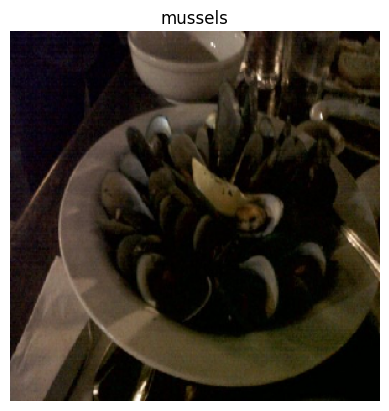

1/1 [==============================] - 0s 26ms/step


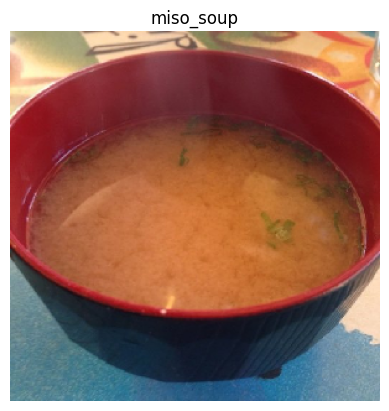

1/1 [==============================] - 0s 37ms/step


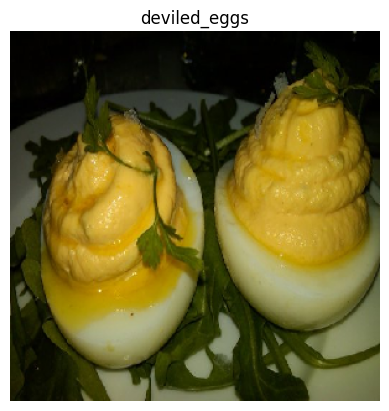

1/1 [==============================] - 0s 24ms/step


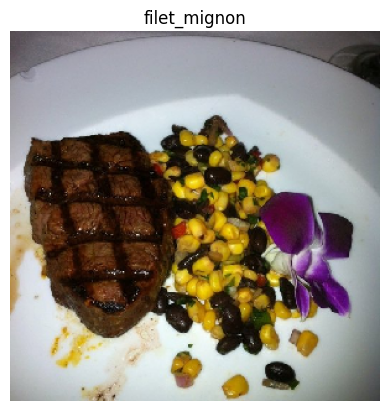

1/1 [==============================] - 0s 26ms/step


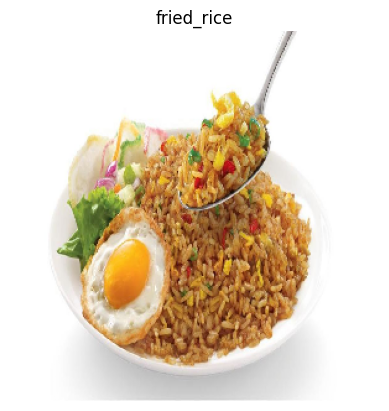

1/1 [==============================] - 0s 26ms/step


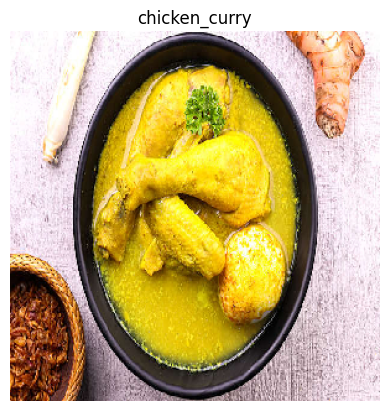

In [ ]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import os
from tensorflow.keras.models import load_model

def create_foodlist(path):
    list_ = list()
    for root, dirs, files in os.walk(path, topdown=False):
      for name in dirs:
        list_.append(name)
    return list_

my_model = load_model('/content/best_model.h5', compile = False)
food_list = create_foodlist('/content/food-101/images')

def predict_class(model, images, show = True):
  for img in images:
    img = image.load_img(img, target_size=(299, 299))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img /= 255.

    pred = model.predict(img)
    index = np.argmax(pred)
    food_list.sort()
    pred_value = food_list[index]
    if show:
        plt.imshow(img[0])
        plt.axis('off')
        plt.title(pred_value)
        plt.show()

images = []
images.append('/content/seafood.jpg')
images.append('/content/soup.jpg')
images.append('/content/egg.jpg')
images.append('/content/meat.jpg')
images.append('/content/nasigoreng.jpg')
images.append('/content/oporayam.jpg')


print("Prediction based picture uploaded")
predict_class(my_model, images, True)